#Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Changing Month to dataetime format


In [12]:
df['Month']= pd.to_datetime(df['Month'])
df.index= df['Month']
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [14]:
del df['Month']

In [15]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

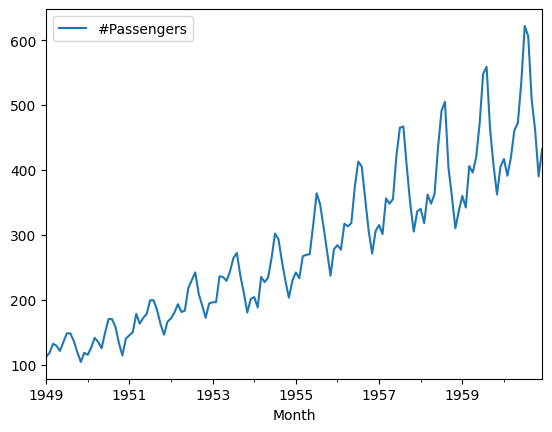

In [17]:
df.plot()

**I**: rolling mean and rolling standard deviation

used to check by plotting if data is stat or not

In [18]:
mean_log = df.rolling(window=12).mean()  #will calculate mean of previous 12 month values and store the data in mean_log
std_log = df.rolling(window=12).std()  #will calculate std dev of previous 12 month values and store the data in std_log

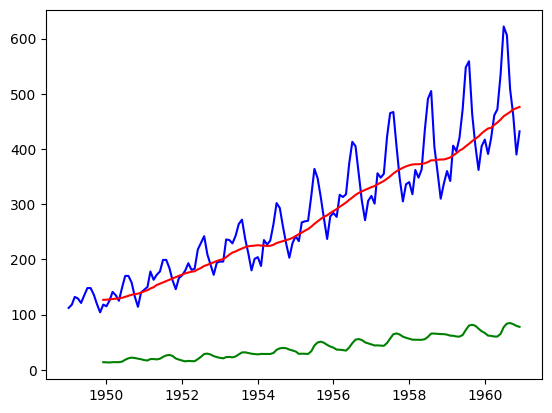

In [19]:
plt.plot(df , color='blue')
plt.plot(mean_log , color='red')
plt.plot(std_log , color='green')

For data to be stat, rolling mean and rolling std curves shall be constant with x-axis (straight wrt x)

In above plot, they are not constant with x-axis: so we can say data is not stationary

In order to confirm that data is non stat: we use tests

MA: is used to build model and forecast values,

Rolling mean is used to check if data is stat or not

**ADF** Test to confirm non stationarity: (if data is stat or not)

**Augumented Dickey Fuller Test**

use this test to get p-value at index 1

compare p value with significance level 0.05


if p>0.05 -> non stat

else p<0.05 -> stat

**Other tests:**
1. KPSS(Kwiatkowski–Phillips–Schmidt–Shin): just conditions are reversed
2. UNIT ROOT TEST: we check if there is unit root in the data

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['#Passengers'])
print(result[1])  #will give p value

0.991880243437641


In [23]:
if result[1]>0.05:
  print('this data is not stationary')
else:
  print('this data is stationary')

this data is not stationary


**Conclusion:**

Data is not stationary

But to build time series model we need data to be stationary, so we will apply transformation to convert non stat data to stat data

**Transforming into stationary data**

In [31]:
# Step: 1: Log transformation: way of tranforming non stat data to stat data

first_log = np.log(df) #will scale down the data
first_log = first_log.dropna() #to remove null values from logged values
first_log.head(10)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


Calculation mean_log on step:1 transformed data (using first_log)

In [43]:
mean_log_1 = first_log.rolling(window=12).mean()  #will calculate mean of previous 12 month values and store the data in mean_log
std_log_1 = first_log.rolling(window=12).std()  #will calculate std dev of previous 12 month values and store the data in std_log

In [44]:
# Step: 2: Subtract log values(first_log) and first log mean data values (mean_log_1)

new_data = first_log - mean_log_1
new_data = new_data.dropna()
new_data.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Now let's plot rolling mean and rolling std dev again to confirm if data is transformed to stat or not

In [45]:
mean_log_new = new_data.rolling(window=12).mean()  #will calculate mean of previous 12 month values and store the data in mean_log
std_log_new = new_data.rolling(window=12).std()  #will calculate std dev of previous 12 month values and store the data in std_log

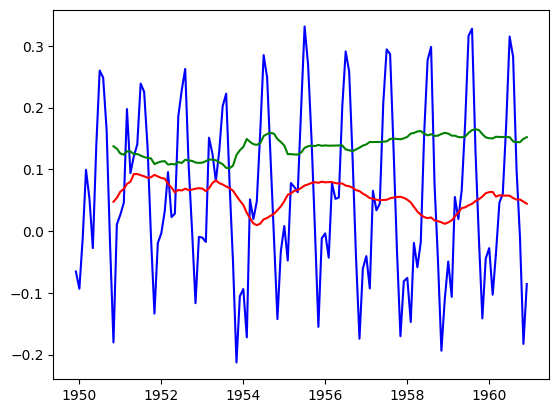

In [46]:
plt.plot(new_data , color='blue')
plt.plot(mean_log_new , color='red')
plt.plot(std_log_new , color='green')

Let's confirm stationary using ADF

In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(new_data['#Passengers'])
print(result[1])  #will give p value

0.022234630001242206


In [48]:
if result[1]>0.05:
  print('this data is not stationary')
else:
  print('this data is stationary')

this data is stationary


Now that data is stat, we can build forecasting model

For that, first we require p,d,q values

**ACF(Auto corelation Factor)**: measures correlation between data/time series and lags(previous data)

eg: **JAN**, **FEB**, **MARCH**, **APRIL**

:gives value of q

**PACF (Partial ACF)**: measures correlation between data/time series and lags(previous data) but it skips intermediate lags

eg: **JAN**, FEB, MARCH, **APRIL**

:gives value of p

In [49]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [50]:
acf_plot = acf(new_data)
pacf_plot = pacf(new_data)

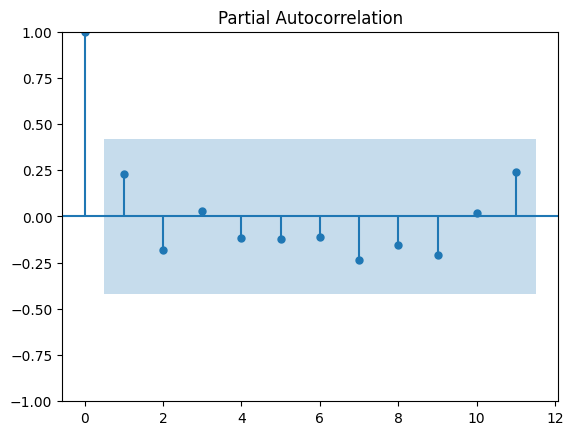

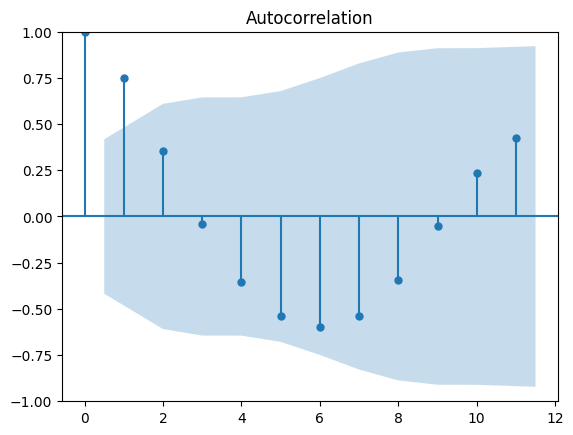

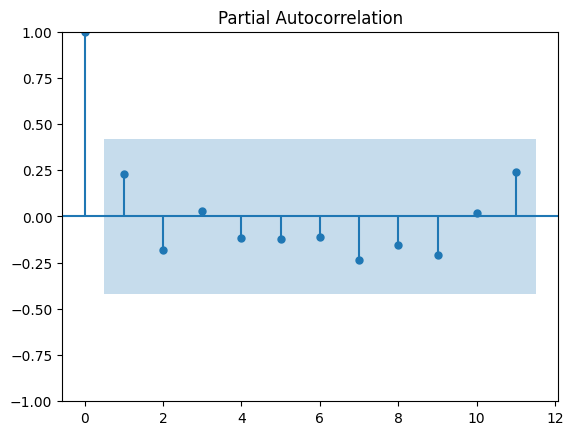

In [51]:
plot_acf(acf_plot)
plot_pacf(pacf_plot)

**d: differencing:** number of times we have applied differncing to make data stationary

Differencing: subtraction each previous value from currrent value

Why we do differncing?

If while converting data from non stat to stat, by just transformation data is not converted to stat, we use differencing.

In our case, by just transformation, data was converted to stat, so for us d=0

In [53]:
# p value: PACF Graph: first most significant value (take p from x axis): from graph p=1
# q value: ACF Graph: first most significant value (take q from x axis): from graph: q=1

# d value: 0

**Model building**

In [54]:
new_data.shape

(133, 1)

In [55]:
train = new_data.iloc[:120]['#Passengers'] #taking 10 years data for train part
test = new_data.iloc[120:]['#Passengers'] #taking rest data for test part

In [56]:
from statsmodels.tsa.arima.model import ARIMA

#ARIMA: ARIMA(train, order=(p,d,q))

model = ARIMA(train, order=(1,0,1))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

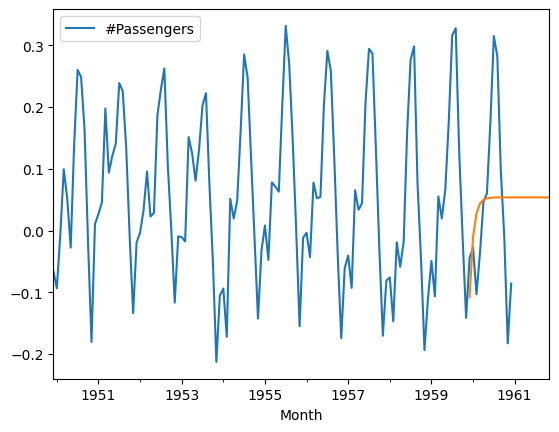

In [58]:
forecast = model.forecast(steps=24)  #steps=12 means forecast for next 12 months
new_data.plot()
forecast.plot()

Here, orange line represent forecast of 24 months (2 year)

Clearly, it is not a good forecast

Due to which we will consider SARIMAX model, where we also consider seasonality.

Seasonality: how many previous data values we want to consider from future forecasting

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#SARIMAX(train, order=(p,d,q), seasonal_order = (p,d,q,s)): here s means seasonality

model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,0,1,12))
model= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

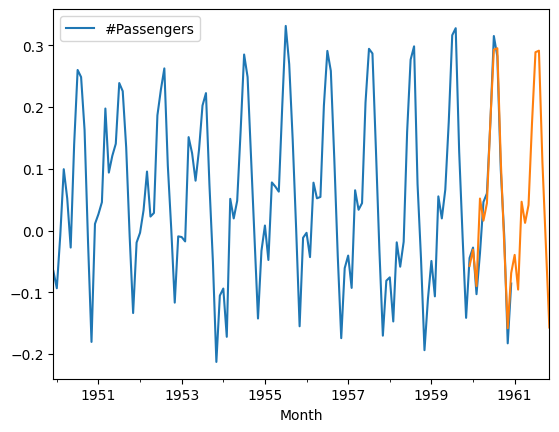

In [61]:
forecast = model.forecast(steps = 24)
new_data.plot()
forecast.plot()